# <font color='green'>Herramientas científicas en python</font>
### Profesor: Act Fernando Ortega  
###  Curso : DATA SCIENCE AND MACHINE LEARNING APPLIED TO FINANCIAL MARKETS  

Scipy es una biblioteca abierta para python la cual se compone de herramientas y algoritmos que sirven para resolver problemas matematicos como optimizaciones, interpolaciones, integración , resolución de ecuaciones entre varias más.  
Scipy basa su procesamiento en los objetos de numpy por lo cual es una buena herramienta para combinar los procesamientos de ambas librerias.
El uso base de la arquitectura de Scipy son los vectores multidimensionales , los cuales son proporcionados por Numpy.
Para los fines de nuestro curso veremos cuatro herramientas de esta libreria:  
* Integración
* Interpolación
* Ecuaciones no lineales
* Optimización de funciones

## Integración Númerica


Como sabemos, integrar una función de forma analítica no siempre es posible; en muchos casos, la solución exacta es demasiado compleja o simplemente no existe en términos elementales. Por ejemplo, consideremos la siguiente integral:

$ \begin{equation}
f(x) = \int e^{e^{x}} \cdot dx
\end{equation} $  
  
Este tipo de funciones no puede resolverse mediante técnicas clásicas de integración. En estos casos, una alternativa eficaz es recurrir a métodos de integración numérica, los cuales permiten aproximar el valor de la integral mediante algoritmos que minimizan el error de estimación. Estas técnicas nos permiten obtener soluciones cercanas a la real, facilitando así el análisis y modelado de funciones complejas en ciencia de datos y otras disciplinas aplicadas.

Para realizar la integración numérica de una función de una sola variable en Python, podemos utilizar la función quad del submódulo integrate de SciPy. Su uso básico es el siguiente:

In [ ]:
sol = integrate.quad(lambda x: f(x), a, b)

In [ ]:
#las funciones lambda nos ayudan a ahorrar memoria. se quedan únicamente en la celda

Aquí, f(x) representa la función que deseamos integrar, mientras que a y b son los límites inferior y superior del intervalo de integración, respectivamente. Al ejecutar esta instrucción, el resultado será una tupla que contiene dos valores: el primero es la **aproximación numérica** de la integral, y el segundo es una estimación del error asociado al cálculo.

Primero, importamos el submódulo integrate de la biblioteca scipy, que nos proporciona las herramientas necesarias para realizar integración numérica. También importamos numpy como np, ya que lo utilizaremos para definir funciones matemáticas y manejar arreglos de forma eficiente:



In [1]:
from scipy import integrate
import numpy as np


Antes de aplicar un método de integración numérica, primero debemos definir la función que deseamos integrar. Para comenzar, trabajaremos con funciones sencillas cuyas integrales conocemos, lo cual nos permitirá comparar los resultados obtenidos numéricamente con sus soluciones exactas y validar la precisión del método.


$
\
\int_{0}^{10}  \! x^{2}-2x \, dx = 233.34
\
 $

In [4]:
# Definimos la función a integrar
def f(x):
    return (x**2 - 2*x)

# Calculamos la integral definida de f(x) desde 0 hasta 10
resultado = integrate.quad(f, 0, 10)

# Mostramos el resultado aproximado de la integral
print(f"El valor aproximado de la integral es: {np.round(resultado[0], 2)}")

# Mostramos la estimación del error del método numérico
print(f"El error estimado de la aproximación es: {np.round(resultado[1], 10)}")

El valor aproximado de la integral es: 233.33
El error estimado de la aproximación es: 0.0


Como podemos observar, la función integrate.quad devuelve una tupla que contiene dos valores: el primero es el resultado de la aproximación numérica de la integral, y el segundo es una estimación del error asociado al método. Un aspecto importante a destacar es que, cuando la función a integrar tiene una solución exacta (es decir, cuando existe una primitiva o antiderivada que puede expresarse en términos elementales), la aproximación numérica converge rápidamente, y el error reportado tiende a ser muy pequeño, cercano a cero. Esto confirma la precisión y confiabilidad del método en estos casos.

### Definición de funciones con variables constantes

Otra manera útil de definir nuestras funciones es incorporando parámetros o constantes dentro de ellas, lo cual nos permite reutilizar la misma función para representar una familia de integrales. Esto es especialmente útil cuando queremos analizar cómo cambia la integral al modificar ciertos valores.

In [7]:
# Definimos nuestra función a integrar, incluyendo un parámetro adicional A
def f(x, A):
    return (x**2 - A*x)

# Si intentamos integrar sin especificar el valor de A, obtendremos un error
# integrate.quad(f, 0, 10)  # ❌ Esto causaría un error porque falta el valor de A

# Para pasar la constante A, utilizamos el argumento 'args' como una tupla
resultado = integrate.quad(f, 0, 10, args=(2,))  # Aquí A = 2

# Mostramos el resultado de la integración numérica
print(f"El valor aproximado de la integral es: {np.round(resultado[0], 2)}")

# Mostramos la estimación del error asociado a la aproximación
print(f"El error estimado de la aproximación es: {np.round(resultado[1], 10)}")

El valor aproximado de la integral es: 233.33
El error estimado de la aproximación es: 0.0


Como podemos observar, nuestra función quedó parametrizada, lo que nos permite modificar el valor de la constante fácilmente sin necesidad de definir una nueva función cada vez. Gracias al uso del argumento args en integrate.quad, podemos reutilizar la misma definición para calcular distintas integrales simplemente cambiando el valor del parámetro, lo cual es muy útil para analizar el efecto de diferentes constantes sobre el resultado de la integración.

In [8]:
#Cuaquier constante la especificaremos por medio del argumento args
resultado = integrate.quad(f,-10,10,args=(np.pi))

print(f"Mi resultado es {np.round(resultado[0],2)}")
print(f"El error de la aproximación es {np.round(resultado[1],10)}")

Mi resultado es 666.67
El error de la aproximación es 0.0


### Límites de integración

Al definir nuestra función a integrar, el método integrate.quad nos permite especificar los límites de integración de forma flexible y paramétrica. Estos límites pueden ser cualquier número real, representando intervalos finitos. Sin embargo, en muchos casos es necesario integrar en intervalos infinitos, como desde −∞ hasta un número real, o incluso en todo el conjunto de los reales (−∞,+∞). Para estos casos, SciPy permite usar **-np.inf y np.inf para representar los límites de integración infinitos**, facilitando así la aproximación numérica de integrales impropias en cualquier rango deseado.

In [ ]:
np.inf

inf

In [9]:
def g(x):
    return(np.exp(-x))

In [10]:
solucion = integrate.quad(g, 0, np.inf)

In [11]:
print(f"Mi resultado es {np.round(solucion[0],2)}")
print(f"El error de la aproximación es {np.round(solucion[1],10)}")

Mi resultado es 1.0
El error de la aproximación es 1e-10


### Otro ejemplo generalizando la distribucion exponencial  
$f(x)=\lambda e^{-\lambda x }$  si x>0

In [12]:
def g(x,A):
    return(A*np.exp(-x*A))

In [13]:
solucion=integrate.quad(g,0, np.inf,args=(3))

In [14]:
print(f"Mi resultado es {np.round(solucion[0],5)}")
print(f"El error de la aproximación es {np.round(solucion[1],10)}")

Mi resultado es 1.0
El error de la aproximación es 1.05e-08


In [ ]:
#Es una función de densidad de probabilidad, por eso debe sumar 1.

### Aproximacion de la distribucion normal

$f_x(x) = \frac{1}{\sqrt{2\pi}} \, \exp\left(-\frac{x^2}{2}\right)$

In [15]:
def n(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-0.5*(x**2)))

In [16]:
solucion=integrate.quad(n,-np.inf, np.inf)

In [17]:
print(f"Mi resultado es {np.round(solucion[0],2)}")
print(f"El error de la aproximación es {np.round(solucion[1],10)}")

Mi resultado es 1.0
El error de la aproximación es 1.02e-08


In [ ]:
#e y pi son números trascendentes: número que no es raíz de ningún polinomio con coeficientes racionales. En otras palabras, no puede ser solución de una ecuación algebraica con coeficientes racionales.

### Generalización de la normal

$f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \, \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$


In [18]:
def n(x,desv,mean):
    return((1/np.sqrt(2*np.pi*desv))*np.exp(-0.5*(((x-mean)/desv)**2)))

In [19]:
solucion=integrate.quad(n,-np.inf, np.inf,args=(1,0)) #---normal estándar pero se puede personalizar

In [20]:
print(f"Mi resultado es {np.round(solucion[0],5)}")
print(f"El error de la aproximación es {np.round(solucion[1],10)}")

Mi resultado es 1.0
El error de la aproximación es 1.02e-08


### Definición con funciones lambda

In [21]:
#Usamos la funcion integrate combinada con la funcion lambda
#no redondeo
solucion = integrate.quad(lambda x,desv,mean: (1/np.sqrt(2*np.pi*desv))*np.exp(-0.5*(((x-mean)/desv)**2)),-np.inf, np.inf,args=(1,0))

In [22]:
np.round(solucion[0],2)

np.float64(1.0)

# integrales dobles

Para hacer una **integracion doble **utilizaremos la funcion **dblquad** que se encuentra en la libreria scipy.integrate.dblquad.  

La forma general de dblquad es scipy.integrate.dblquad (func, a, b, gfun, hfun). Donde, func es el nombre de la función que se integrará, 'a' y 'b' son los límites inferior y superior de la variable x, respectivamente, mientras que gfun y hfun son los nombres de las funciones que definen los límites inferior y superior. de la variable y.

Como ejemplo, realicemos el método de doble integral.

$ \int_ {0} ^ {1}  \int_ {0} ^ {2} x^{2}y^{2} \: dx dy $

Definimos las funciones f, g y h, utilizando las expresiones lambda. hay que tener en cuenta que incluso si g y h son constantes, deben definirse como funciones.

In [26]:
#Definimos uestra funcion bi variada en una funcion lambda
f = lambda y, x: x**2*y**2

#aplicamos el metodo dblquad

solucion= integrate.dblquad(f, 0, 2, lambda y: 0, lambda y: 1)
                                # funcion lim   funcion lim
                                # inferior y     superior y


In [24]:
#2 Definimos uestra funcion bi variada en una funcion lambda
f = lambda y, x: x**2*y**2
#aplicamos el metodo dblquad
solucion= integrate.dblquad(f, 0, 1, lambda y: 0, lambda y: 2)
                                # funcion lim   funcion lim
                                # inferior y     superior y


In [ ]:
#cuando integramos sobre límites reales no importa el orden

In [27]:
print(f"Mi resultado es {np.round(solucion[0],5)}")
print(f"El error de la aproximación es {np.round(solucion[1],10)}")

Mi resultado es 0.88889
El error de la aproximación es 0.0


### integración doble con limites variables

$ \int_ {0} ^ {0.5}  \int_ {0} ^ {\sqrt {1-4y ^ 2}} 16xy \: dx dy$

In [28]:
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : np.sqrt(1-4*y**2)
#definimos las funciones

In [29]:
solucion = integrate.dblquad(lambda x, y : 16*x*y, 0, .5, lambda x : 0, lambda y : np.sqrt(1-4*y**2))
#de adentro hacia afuera, declaramos primero el de afuera, después el de adentro con el límite/función.

In [30]:
print(f"Mi resultado es {np.round(solucion[0],5)}")
print(f"El error de la aproximación es {np.round(solucion[1],10)}")

Mi resultado es 0.5
El error de la aproximación es 0.0


### Y las indefinidas?

In [31]:
#importamos el módulo porque estaremos usando variables literales como la x; no reconoce las funciones de python, tiene las propias como log

from sympy import integrate

from sympy.abc import x

from sympy import log

In [32]:
f = x**2 - 3*x + 2

integrate(f)

x**3/3 - 3*x**2/2 + 2*x

In [ ]:
#escribe en formato tipo latex

In [33]:
f = x
integrate(f)

x**2/2

In [34]:
f = 1/x
integrate(f)

log(x)

In [35]:
import numpy as np

In [36]:
f = log(x)
integrate(f)

x*log(x) - x

In [37]:
from sympy import exp

In [38]:
f = 5*(exp(-5*x))
integrate(f)

-exp(-5*x)

In [39]:
from sympy import symbols, integrate

x, y = symbols('x y')

f = x**2 - 3*x*y + 2

integrate(f, x)

x**3/3 - 3*x**2*y/2 + 2*x

In [40]:
integrate(f, y)

-3*x*y**2/2 + y*(x**2 + 2)

## Ajustes de curvas e Interpolación

En muchas ocasiones, al realizar experimentos o análisis estadísticos, nos enfrentamos a conjuntos de datos que esperamos sigan cierto comportamiento ideal. Sin embargo, este comportamiento puede verse afectado por diversos factores, como errores de medición, errores de muestreo, entre otros. Frente a esta situación, es necesario aplicar técnicas de ajuste de datos, cuyo objetivo es adaptar los datos observados a un modelo estándar que describa su tendencia general.

Por otro lado, puede ocurrir que dispongamos de una serie de datos muestreados y queramos estimar valores intermedios o fuera del rango de la muestra original. Para ello, construimos una curva que pase por los puntos conocidos, y con base en esta curva podemos predecir valores nuevos siguiendo el modelo generado.

Cuando trabajamos con un conjunto finito de puntos, la clase interp1d del módulo scipy.interpolate es una herramienta muy útil. Esta clase permite crear una función interpoladora unidimensional que se ajusta exactamente a los datos dados y que puede evaluarse en cualquier punto dentro del dominio definido por esos datos.

En concreto, scipy.interpolate.interp1d() se utiliza para construir funciones unidimensionales de interpolación, las cuales reciben un único valor de entrada y devuelven un único valor de salida basado en el análisis de los puntos originales.

In [42]:
import matplotlib.pyplot as plt

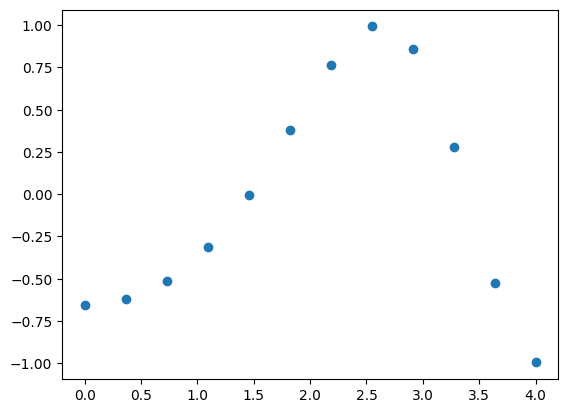

In [43]:
#Definamos el siguiente conjunto de datos
x = np.linspace (0, 4, 12)
y = np.cos (x ** 2/3 + 4)

plt.plot(x, y, 'o ')
plt.show()

In [44]:
#ahora teniendo estos punts prodecemos a ver dos formas de usar la clase interp1d
#interp1d ( conjuntoX , f(x) , tipo )
from  scipy.interpolate import interp1d

f1 = interp1d(x,y) #instanciamos este objeto


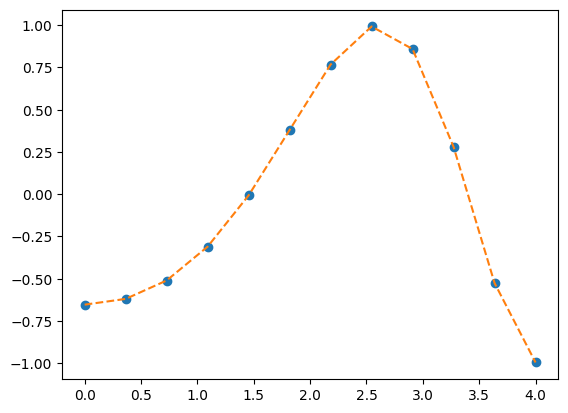

In [45]:
plt.plot(x, y, 'o')
plt.plot(x, f1(x), '--')
plt.show()

In [ ]:
#unir los puntos con líneas rectas. entre más lineales sean, utilizamos los lineales
#por defecto nos da grado 1 o grado 3 (uniones cúbicas, un polinomio suave)

In [46]:
xnew = np.linspace (0, 4, 100)

In [ ]:
xnew

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

In [47]:
f1(xnew)   #lo evaluamos en el polinomio que ya definimos.

array([-0.65364362, -0.64986787, -0.64609213, -0.64231638, -0.63854063,
       -0.63476488, -0.63098913, -0.62721339, -0.62343764, -0.61966189,
       -0.60756282, -0.59546374, -0.58336466, -0.57126559, -0.55916651,
       -0.54706744, -0.53496836, -0.52286929, -0.51077021, -0.48851541,
       -0.4662606 , -0.4440058 , -0.421751  , -0.39949619, -0.37724139,
       -0.35498658, -0.33273178, -0.31047698, -0.27677451, -0.24307204,
       -0.20936957, -0.1756671 , -0.14196463, -0.10826217, -0.0745597 ,
       -0.04085723, -0.00715476,  0.03583603,  0.07882682,  0.12181761,
        0.1648084 ,  0.20779919,  0.25078998,  0.29378078,  0.33677157,
        0.37976236,  0.42280554,  0.46584872,  0.5088919 ,  0.55193508,
        0.59497826,  0.63802145,  0.68106463,  0.72410781,  0.76715099,
        0.79217812,  0.81720525,  0.84223239,  0.86725952,  0.89228665,
        0.91731378,  0.94234091,  0.96736804,  0.99239518,  0.97755823,
        0.96272128,  0.94788433,  0.93304738,  0.91821043,  0.90

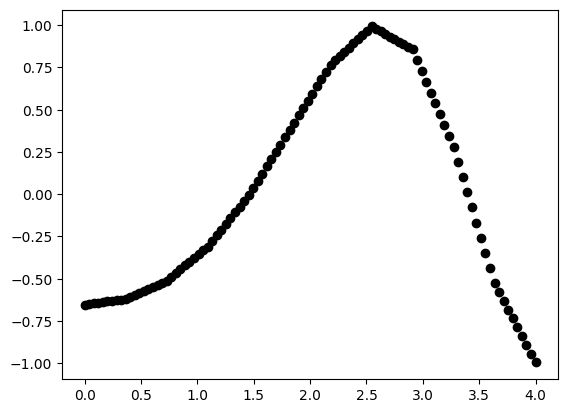

In [48]:
plt.plot(xnew, f1(xnew), 'o',color="black")
#plt.plot(x, y, '--',color="red",linewidth=5)
plt.show()

In [ ]:
#esta curva no es continua por la interpolación

### cubic

La interpolación cúbica (cuando usas kind='cubic' en interp1d) crea una función suave que pasa por todos los puntos dados, pero en lugar de conectar los puntos con líneas rectas (como en la interpolación lineal), usa polinomios de tercer grado (cubos) para conectar los puntos.  

¿Qué significa esto en la práctica?  

* Cada segmento entre dos puntos adyacentes se aproxima con un polinomio cúbico.

* Estos polinomios se construyen de forma que la función resultante es suave y tiene derivadas continuas hasta el segundo orden, lo que evita los “saltos” o esquinas abruptas que sí pueden aparecer en la interpolación lineal.

* Esto da lugar a una curva más natural y continua, especialmente útil cuando la función original que modelas se espera que sea suave.  

Ventajas:  

* Más suave y natural para datos continuos.

* Mejora la precisión en muchos casos, especialmente cuando los datos provienen de fenómenos físicos o naturales.  

Consideraciones:  

* Requiere al menos 4 puntos para funcionar correctamente.

* Puede presentar oscilaciones no deseadas (fenómeno de Runge) si los puntos están muy alejados o mal distribuidos.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Definimos otro intervalo mas particionado dentro de nuestro dominio
x=np.linspace (0, 4,20)

y = np.cos (x ** 2/3 + 4)


In [51]:
np.linspace (0, 4.20)

array([0.        , 0.08571429, 0.17142857, 0.25714286, 0.34285714,
       0.42857143, 0.51428571, 0.6       , 0.68571429, 0.77142857,
       0.85714286, 0.94285714, 1.02857143, 1.11428571, 1.2       ,
       1.28571429, 1.37142857, 1.45714286, 1.54285714, 1.62857143,
       1.71428571, 1.8       , 1.88571429, 1.97142857, 2.05714286,
       2.14285714, 2.22857143, 2.31428571, 2.4       , 2.48571429,
       2.57142857, 2.65714286, 2.74285714, 2.82857143, 2.91428571,
       3.        , 3.08571429, 3.17142857, 3.25714286, 3.34285714,
       3.42857143, 3.51428571, 3.6       , 3.68571429, 3.77142857,
       3.85714286, 3.94285714, 4.02857143, 4.11428571, 4.2       ])

In [52]:
f2 = interp1d(x,y,kind="cubic")

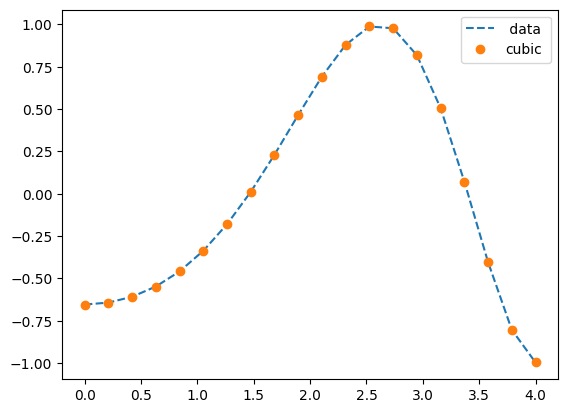

In [53]:
plt.plot(x, y, '--')
plt.plot(x, f2(x), 'o')
plt.legend ([' data ', 'cubic'])
plt.show()

In [54]:
f2.y

array([-0.65364362, -0.64239186, -0.60780532, -0.54754287, -0.45823512,
       -0.33635582, -0.17955396,  0.01152582,  0.23102662,  0.4655774 ,
        0.69252883,  0.87970334,  0.98789369,  0.97727774,  0.81822772,
        0.50543145,  0.07183292, -0.40377533, -0.80324425, -0.99582185])

In [55]:
f2(2)

array(0.5818299)

In [58]:
f2(2.34454)

array(0.90005172)

In [57]:
f2([1,2,3])

array([-0.37004142,  0.5818299 ,  0.7538248 ])

In [56]:
f2(np.array([1,2,3]))

array([-0.37004142,  0.5818299 ,  0.7538248 ])

# Polinomios de interpolacion

En análisis numérico, la interpolación polinómica es una técnica que consiste en aproximar un conjunto de datos o una función mediante un polinomio. Es decir, dado un conjunto finito de puntos obtenidos por muestreo o a partir de un experimento, el objetivo es encontrar un polinomio que pase exactamente por todos esos puntos, permitiendo así estimar valores intermedios de manera precisa.

Ejemplo, supongamos tenemos los siguientes datos.

In [59]:
# Datos
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, 2])

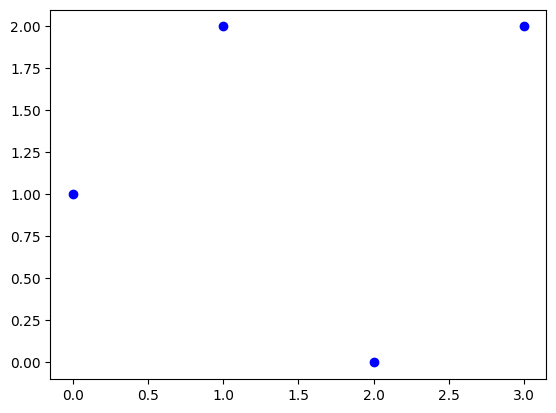

In [60]:
plt.plot(x, y,'bo')
plt.show()

¿Qué es BarycentricInterpolator?  

BarycentricInterpolator es una clase en scipy.interpolate que implementa la interpolación polinómica usando la fórmula barycéntrica. Es una forma eficiente y numéricamente estable para evaluar el polinomio que pasa exactamente por un conjunto dado de puntos.

En la interpolación polinómica tradicional (como la fórmula de Lagrange), para construir el polinomio que pasa por todos los puntos, calculamos una combinación de polinomios básicos que dependen de todos los punto x1.  
La fórmula barycéntrica reformula esa interpolación de manera más eficiente usando un conjunto de pesos (wi) asignados a cada punto xi.stos pesos se calculan una sola vez solo a partir de las posiciones xi,decir, no dependen de los valores yi,solo de dónde están ubicados los puntos en el eje
x.

Qué es la fórmula barycéntrica?  

La fórmula barycéntrica es una manera de representar el polinomio interpolador de Lagrange que:

* Es muy eficiente computacionalmente.

* Reduce problemas numéricos comunes en la interpolación polinómica tradicional, como cancelaciones numéricas y errores de redondeo.

* Permite evaluar el polinomio interpolador en nuevos puntos sin recalcular los coeficientes completos.

¿Cómo funciona?  

* Dado un conjunto de puntos (xi,yi), BarycentricInterpolator construye internamente pesos barycéntricos que dependen solo de los xi .

* Cuando se evalúa la función en un nuevo punto x, usa esos pesos para calcular el valor del polinomio interpolador sin necesidad de reconstruirlo desde cero.

In [61]:
from scipy.interpolate import BarycentricInterpolator

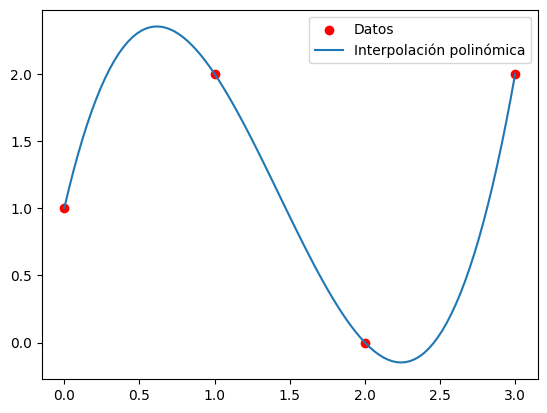

In [62]:
# Crear interpolador
interp = BarycentricInterpolator(x, y)  #x, y son los puntos definidos anteriormente

# Evaluar en nuevos puntos
x_new = np.linspace(0, 3, 100)
y_new = interp(x_new)

# Graficar
plt.scatter(x, y, color='red', label='Datos')
plt.plot(x_new, y_new, label='Interpolación polinómica')
plt.legend()
plt.show()

#### Otra opción

Usando numpy.polyfit con grado igual al número de puntos menos uno
Ajusta un polinomio que pasa por todos los puntos (en condiciones ideales).  

**Condiciones ideales para interpolación exacta con polyfit**
* Los puntos xi son todos distintos (no hay valores repetidos en x): Si hay valores repetidos, el sistema no es invertible y no se puede encontrar un polinomio único.

* No hay ruido ni error en los datos yi: Si los datos contienen ruido, el polinomio ajustado puede oscilar mucho para tratar de pasar exactamente por todos los puntos, generando un fenómeno llamado "sobreajuste".

* La precisión numérica es suficiente: Para muchos puntos, los cálculos polinómicos pueden sufrir inestabilidades numéricas (pérdida de precisión).

* La distribución de puntos es favorable: Puntos muy dispersos o mal distribuidos pueden causar oscilaciones en el polinomio interpolador (fenómeno de Runge).

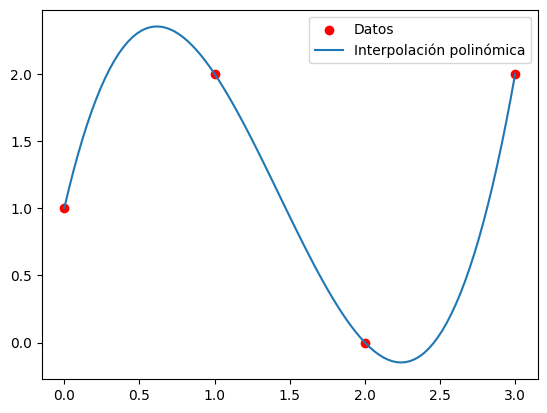

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, 2])

# Ajustar polinomio de grado 3 (número de puntos - 1)
coef = np.polyfit(x, y, deg=3)

# Evaluar polinomio
x_new = np.linspace(0, 3, 100)
y_new = np.polyval(coef, x_new)

# Graficar
plt.scatter(x, y, color='red', label='Datos')
plt.plot(x_new, y_new, label='Interpolación polinómica')
plt.legend()
plt.show()

In [ ]:
#utiliza mínimos cuadrados para el ajuste

In [69]:
coef

array([ 1.16666667, -5.        ,  4.83333333,  1.        ])

In [ ]:
#coeficientes de x^3, x^2, x y 1

### Otro uso de polyfit:  Ajuste polinómico

* En interpolación polinómica, el polinomio pasa exactamente por todos los puntos (grado n−1 para n puntos).

* En ajuste con polyfit de grado menor que n−1, no pasa por todos, solo aproxima.

Dado este conjunto de datos queremos verificar un polinomio (preferentemente el de grado menor) para ajustarlo sobre los puntos.

In [70]:
# Datos de ejemplo (5 puntos)
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 1, 3, 7])

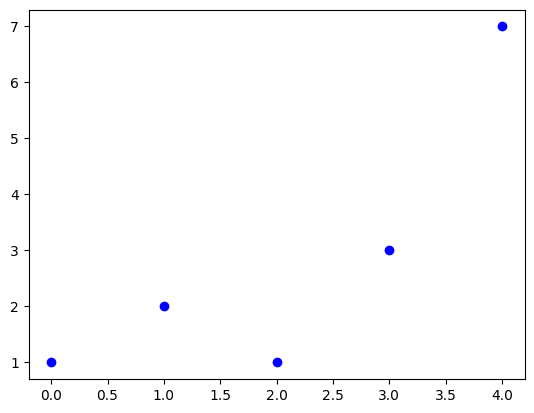

In [71]:
plt.plot(x, y,'bo')
plt.show()

In [84]:
pol = np.polyfit(x,y,2)  #ajustamos un polinomio con nuestras cordenadas especificando el grado del mismo.

In [85]:
pol    # nos ajusto -0.125x^2 + 1.83928571x -0.21428571

array([ 0.64285714, -1.27142857,  1.48571429])

In [86]:
# evaluamos nuestro polinomio sobre un rango

xx = np.linspace(min(x),max(x))
yy = np.polyval(pol,xx)

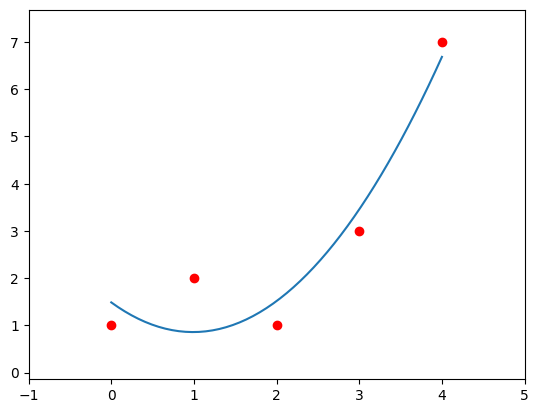

In [87]:
d=1
plt.plot(xx, yy, '-',x, y, 'ro')
plt.axis([min(xx)-d, max(xx)+d, min(yy)-d, max(yy)+d]);


In [ ]:
#grado dos ajusta bien al modelo; tratamos de bajar la complejidad pero esperando que ajuste lo mejor posible.

In [ ]:
#equivalente
xx = np.linspace(min(x),max(x))
yy= (0.64285714)*(xx**2) + -1.27142857*xx +1.48571429

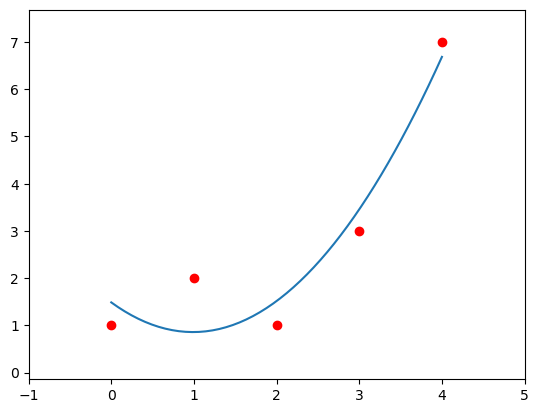

In [ ]:
d=1
plt.plot(xx, yy, '-',x, y, 'ro')
plt.axis([min(xx)-d, max(xx)+d, min(yy)-d, max(yy)+d]);


Teniendo ajustado nuestro polinomio , podemos predecir (evaluar) con el polinomio ajustado

In [88]:
predic=np.poly1d(pol)

In [89]:
predic(3.5)

np.float64(4.910714285714286)

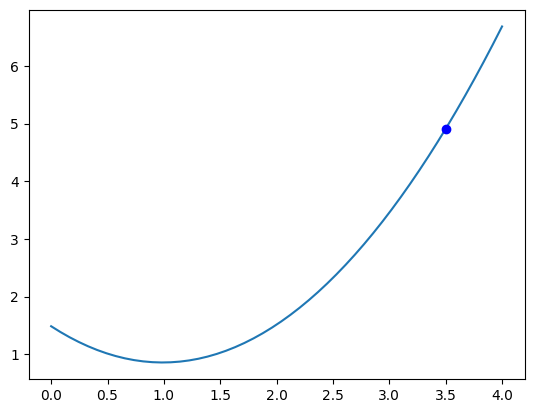

In [90]:
plt.plot(xx, yy)
plt.plot(3.5,predic(3.5),'bo')
plt.show()

Definamos una funcion que nos ajuste un polinomio indicandole el grado

In [91]:
class polinomial():

    def __init__(self,x,y,grado):
        self.x=x
        self.y=y
        self.grado=grado

    def predic(self,data):
        pol = np.polyfit(self.x,self.y,self.grado)
        predic= np.poly1d(pol)
        prediccion=predic(data)
        return((predic(data),plt.plot(np.linspace(min(self.x),max(self.x)), predic(np.linspace(min(self.x),max(self.x))), '-',self.x, self.y, 'ro')))

### Probamos nuestra clase

In [92]:
# Datos de ejemplo (5 puntos)
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 1, 3, 7])

In [93]:
polinomio= polinomial(x,y,3)

(array([1.08571429, 1.20707528, 1.31143656, 1.3998861 , 1.47351189,
        1.5334019 , 1.58064412, 1.61632653, 1.64153711, 1.65736385,
        1.66489473, 1.66521772, 1.65942082, 1.648592  , 1.63381924,
        1.61619053, 1.59679385, 1.57671718, 1.55704851, 1.53887581,
        1.52328707, 1.51137026, 1.50421338, 1.5029044 , 1.50853131,
        1.52218208, 1.54494471, 1.57790716, 1.62215743, 1.6787835 ,
        1.74887334, 1.83351495, 1.93379629, 2.05080536, 2.18563014,
        2.3393586 , 2.51307873, 2.70787852, 2.92484594, 3.16506898,
        3.42963561, 3.71963383, 4.0361516 , 4.38027693, 4.75309777,
        5.15570213, 5.58917798, 6.0546133 , 6.55309607, 7.08571429]),
  <matplotlib.lines.Line2D at 0x78815cdb9cd0>])

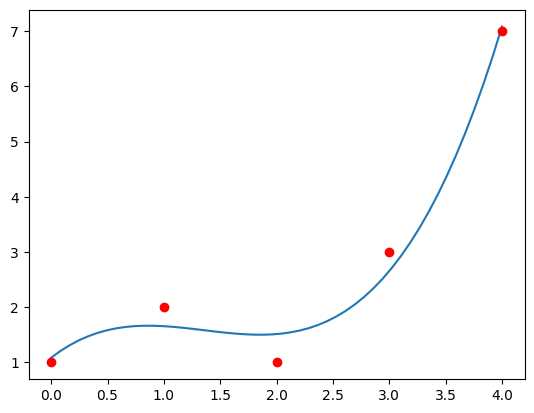

In [94]:
polinomio.predic(np.linspace(min(x),max(x)))

## Problemas de la interpolación polinomica

Una idea equivocada común es pensar que, sin importar cuántos puntos tengamos, siempre podemos construir un polinomio que pase por todos ellos y que ese polinomio representará fielmente el fenómeno original. Sin embargo, existe un fenómeno conocido como "fenómeno de Runge", que muestra que al usar polinomios de grado muy alto para interpolar muchos puntos, la curva puede oscilar excesivamente entre los puntos de datos. Estas oscilaciones producen un ajuste inestable que no refleja adecuadamente el comportamiento real de los datos, lo que limita la utilidad práctica de la interpolación polinómica para conjuntos grandes de puntos.

El fenómeno de Runge es un problema clásico en interpolación polinómica que ocurre cuando se intenta ajustar un polinomio de grado muy alto a un conjunto de puntos equiespaciados. En particular, a medida que aumentamos el grado del polinomio (es decir, cuantos más puntos intentamos interpolar exactamente), el polinomio puede empezar a oscilar fuertemente, especialmente cerca de los extremos del intervalo. Esto genera una curva con picos y valles artificiales que no reflejan el comportamiento real de los datos.  

El fenómeno fue observado por Carl Runge, quien mostró este problema usando la función:



$f(x) =\frac{1}{1+25x^{2}}$

al interpolarla con polinomios de grado creciente en puntos equidistantes en [−1,1].

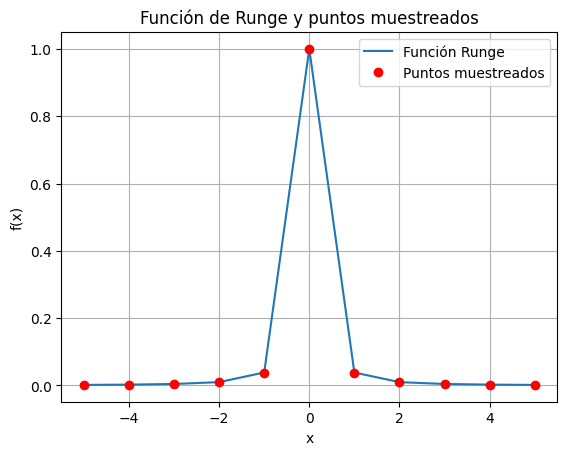

In [95]:
# Definimos la función de Runge
def runge(x):
    return 1 / (1 + 25 * x**2)

# Generamos puntos en el intervalo [-3, 3] con paso 1 (pocos puntos)
xp = np.arange(-5, 6, 1)  # np.arange final es excluyente, por eso 4

# Graficamos la función en esos puntos con línea y puntos rojos
plt.plot(xp, runge(xp), '-', label='Función Runge')
plt.plot(xp, runge(xp), 'ro', label='Puntos muestreados')

# Añadimos etiquetas y título
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función de Runge y puntos muestreados')
plt.legend()
plt.grid(True)

plt.show()

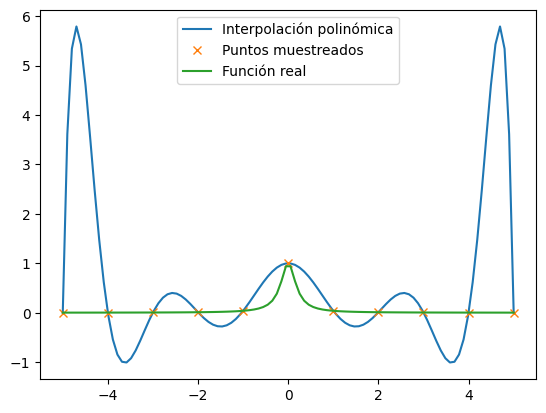

In [97]:
from scipy.interpolate import barycentric_interpolate
# Número de puntos para la interpolación
N = 11
# Puntos equidistantes en el intervalo [-5, 5]
xp = np.linspace(-5, 5, N)

# Evaluamos la función de Runge en esos puntos
fp = runge(xp)

# Generamos puntos finos para evaluar la interpolación y la función real
x = np.linspace(-5, 5, 100)

# Interpolamos usando barycentric_interpolate con los puntos muestreados
y = barycentric_interpolate(xp, fp, x)

# Graficamos la interpolación polinómica (curva suave)
plt.plot(x, y, label='Interpolación polinómica')

# Graficamos los puntos muestreados usados para la interpolación
plt.plot(xp, fp, 'x', label='Puntos muestreados')

# Graficamos la función real de Runge para comparar
plt.plot(x, runge(x), label='Función real')

# Añadimos leyenda en la mejor posición automáticamente
plt.legend(loc='best')

# Mostramos la gráfica
plt.show()

In [ ]:
#problemática de interpolaciones polinómicas

### ¿Por qué ocurre?  

* Los polinomios de grado alto son sensibles a pequeñas variaciones y a la distribución de los puntos.

* Los puntos equidistantes tienden a maximizar estas oscilaciones.

* El ajuste intenta pasar exactamente por todos los puntos, lo que obliga al polinomio a “doblarse” excesivamente.

### ¿Cómo evitar el fenómeno de Runge?  

* Usar nodos de interpolación no equidistantes, como los nodos de Chebyshev, que se agrupan más cerca de los extremos y reducen las oscilaciones.

* Utilizar métodos de interpolación por splines (como splines cúbicos), que construyen funciones por tramos con polinomios de bajo grado y garantizan suavidad, evitando grandes oscilaciones.

* Reducir el grado del polinomio o usar métodos de ajuste (regresión polinómica) en lugar de interpolación exacta cuando hay ruido o muchos puntos.

### Nodos de Chebyshev  

Los nodos de Chebyshev son un conjunto especial de puntos dentro de un intervalo( por ejemplo [-1,1]),que no están equiespaciados, sino que se concentran más cerca de los extremos del intervalo.

Matemáticamente, para n puntos, los nodos de Chebyshev en [−1,1] se definen como:

$x_k = \cos\left(\frac{2k - 1}{2n} \pi\right), \quad k = 1, 2, \ldots, n$

Luego se pueden escalar al intervalo [a,b] para cualquier caso.

####  ¿Por qué son mejores?  

* Al concentrar más puntos cerca de los extremos, los nodos de Chebyshev reducen las grandes oscilaciones que suelen aparecer en la interpolación polinómica con puntos equidistantes, especialmente cerca de los extremos (fenómeno de Runge).

* Esto mejora la estabilidad numérica y la precisión de la interpolación polinómica global.

* Son usados frecuentemente en métodos numéricos porque proporcionan una mejor distribución de los puntos para interpolar.

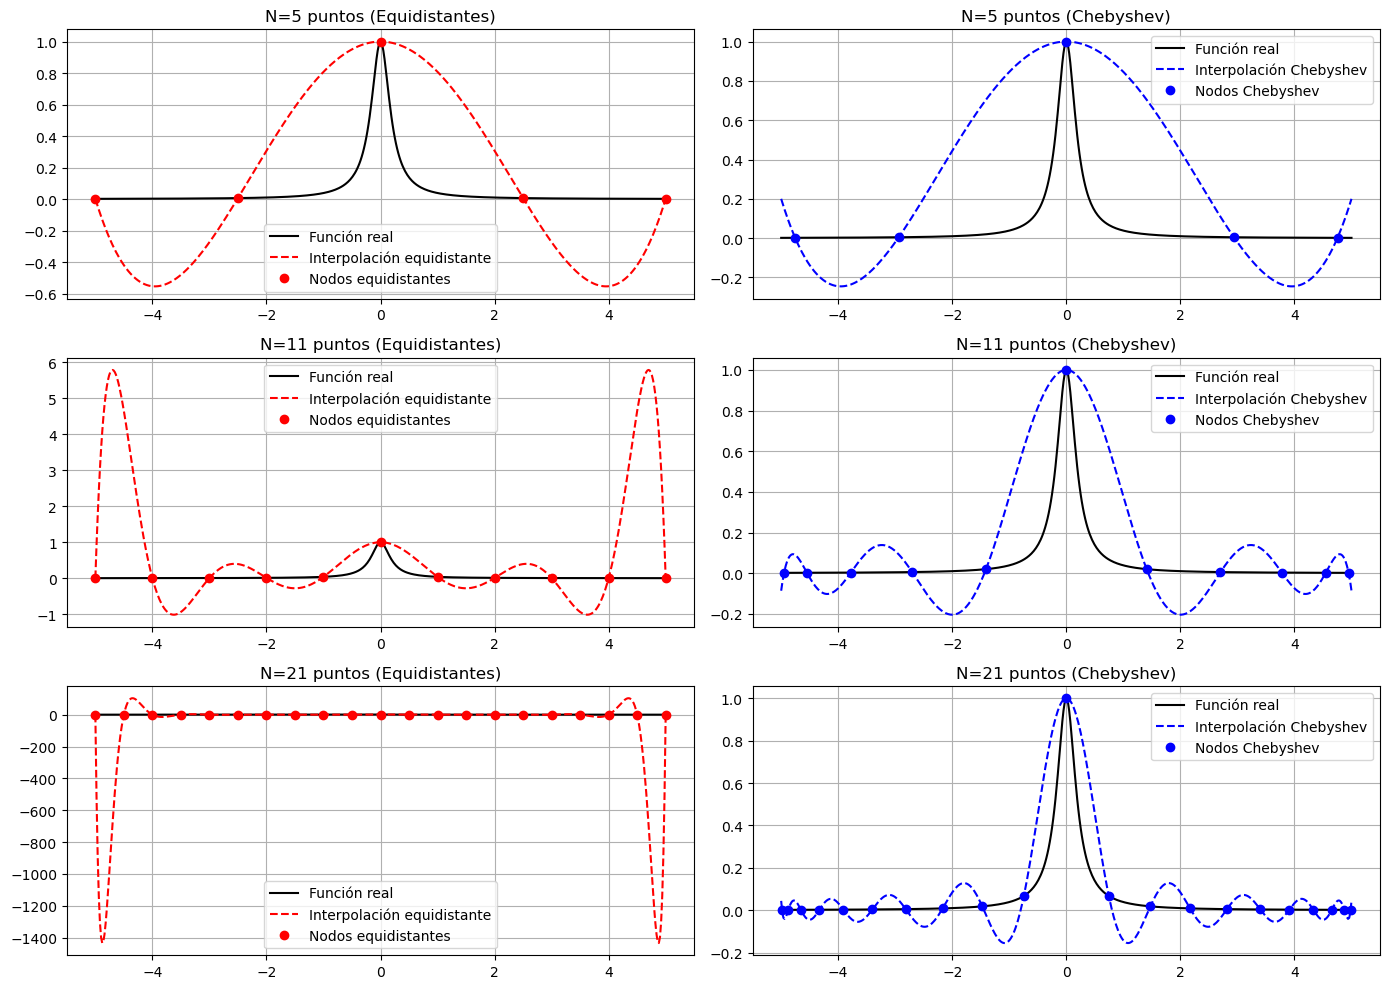

In [ ]:
# Función para nodos de Chebyshev en el intervalo [a,b]
def chebyshev_nodes(a, b, n):
    k = np.arange(1, n+1)
    x_cheb = np.cos((2*k - 1) * np.pi / (2*n))
    # Escalamos de [-1,1] a [a,b]
    return 0.5*(a + b) + 0.5*(b - a)*x_cheb

# Intervalo
a, b = -5, 5

# Diferentes números de puntos
Ns = [5, 11, 21]

x_fine = np.linspace(a, b, 500)
y_true = runge(x_fine)

plt.figure(figsize=(14, 10))

for i, N in enumerate(Ns, 1):
    # Puntos equidistantes
    x_eq = np.linspace(a, b, N)
    y_eq = runge(x_eq)
    y_interp_eq = barycentric_interpolate(x_eq, y_eq, x_fine)

    # Puntos de Chebyshev
    x_ch = chebyshev_nodes(a, b, N)
    y_ch = runge(x_ch)
    y_interp_ch = barycentric_interpolate(x_ch, y_ch, x_fine)

    plt.subplot(len(Ns), 2, 2*i-1)
    plt.plot(x_fine, y_true, 'k', label='Función real')
    plt.plot(x_fine, y_interp_eq, 'r--', label='Interpolación equidistante')
    plt.plot(x_eq, y_eq, 'ro', label='Nodos equidistantes')
    plt.title(f'N={N} puntos (Equidistantes)')
    plt.legend()
    plt.grid(True)

    plt.subplot(len(Ns), 2, 2*i)
    plt.plot(x_fine, y_true, 'k', label='Función real')
    plt.plot(x_fine, y_interp_ch, 'b--', label='Interpolación Chebyshev')
    plt.plot(x_ch, y_ch, 'bo', label='Nodos Chebyshev')
    plt.title(f'N={N} puntos (Chebyshev)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Uso de la clase interp1d contrastando el problema

In [98]:
xp = np.arange(11) -5
fp = runge(xp)
x = np.linspace(-5, 5,100)

In [99]:
f2 = interp1d(xp,fp,kind="cubic")

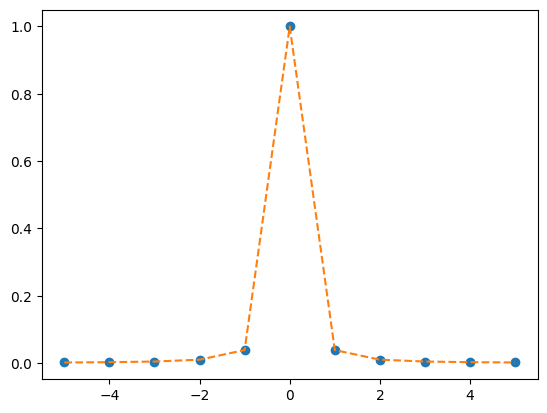

In [100]:

plt.plot(xp, fp, 'o')
plt.plot(xp, f2(xp), '--')
plt.show()

In [ ]:
#buen resultado usando un spline cubico. practicidad gana a complejidad en este caso.

Como vimos en un inicio, este tipo de interpolación no nos genera un polinomio característico que pase por los puntos, sino que genera un función lineal para hacer segmentos de ajustes entre cada dos puntos, asegurando la integridad de estos pero perdiendo suavidad en nuestro modelo.

## Raíces de un polinomio

Obtener las raíces de un polinomio significa encontrar los valores de la variable para los cuales el polinomio se iguala a cero. Es decir, son los puntos donde la función polinómica cruza o toca el eje  x.  

Matemáticamente, si tienes un polinomio  

$p(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0,$

las raíces son los valores x=r que satisfacen  
$p(r) = 0.$

Encontrar estas raíces es importante porque indica los puntos donde la función cambia de signo o tiene soluciones, y tiene múltiples aplicaciones en matemáticas, física, ingeniería y otras ciencias.

Obtener las raíces de un polinomio es fundamental en muchas áreas de las matemáticas, la ingeniería y las ciencias aplicadas porque:  

* Solución de ecuaciones: Las raíces son los valores de la variable para los cuales el polinomio se anula (es cero). Encontrar estas raíces es equivalente a resolver ecuaciones polinómicas, que aparecen en numerosos problemas prácticos.

* Análisis de comportamiento de funciones: Las raíces permiten conocer dónde una función cambia de signo, lo cual es clave para estudiar intervalos de crecimiento, decrecimiento y para determinar máximos y mínimos relativos.

* Factoreo y simplificación: Conocer las raíces permite factorizar el polinomio en factores lineales o cuadráticos, simplificando cálculos y análisis posteriores.

* Base para métodos numéricos :Muchas técnicas numéricas, como métodos iterativos para resolver ecuaciones no lineales, se basan en aproximar raíces.

Las raíces son: -2.0, 3.0, 1.0


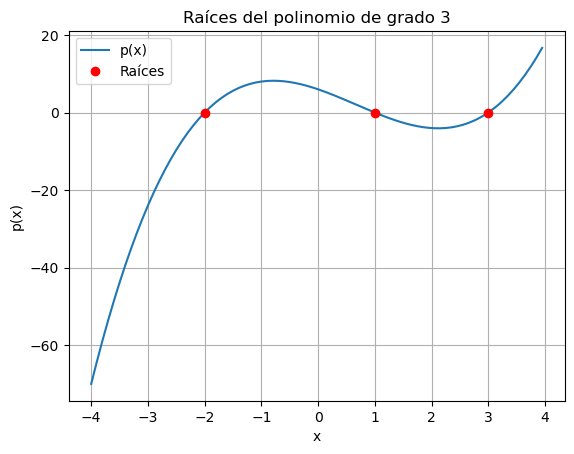

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el polinomio mediante una lista con sus coeficientes,
# de mayor a menor grado:
# p(x) = x^3 - 2x^2 - 5x + 6
polinomio = [1, -2, -5, 6]

# Generamos un arreglo de valores x donde evaluaremos el polinomio
x = np.arange(-4, 4, 0.05)

# Evaluamos el polinomio en cada punto de x usando numpy.polyval
y = np.polyval(polinomio, x)

# Calculamos las raíces del polinomio (valores donde p(x) = 0)
raices = np.roots(polinomio)

# Evaluamos el polinomio en las raíces para verificar que son ceros
val_en_raices = np.polyval(polinomio, raices)

# Imprimimos las raíces redondeadas a 2 decimales
print(f"Las raíces son: {', '.join([str(np.round(r, 2)) for r in raices])}")

# Graficamos el polinomio en el intervalo definido
plt.plot(x, y, '-', label='p(x)')

# Graficamos las raíces como puntos (deberían estar cerca de y=0)
plt.plot(raices, val_en_raices, 'ro', label='Raíces')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'Raíces del polinomio de grado {len(polinomio) - 1}')
plt.legend()
plt.grid(True)
plt.show()



Las raíces son: -1.96, -0.42, 0.28


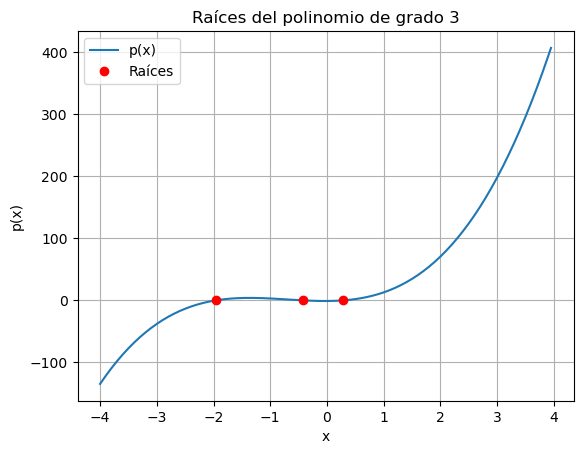

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el polinomio con sus coeficientes (de mayor a menor grado)
# p(x) = 4.3 x^3 + 9 x^2 + 0.6 x - 1
polinomio = [4.3, 9, 0.6, -1]

# Generamos un arreglo de valores x para evaluar el polinomio
x = np.arange(-4, 4, 0.05)

# Evaluamos el polinomio en cada punto de x
y = np.polyval(polinomio, x)

# Calculamos las raíces del polinomio
raices = np.roots(polinomio)

# Evaluamos el polinomio en las raíces (debería dar valores cercanos a cero)
val_en_raices = np.polyval(polinomio, raices)

# Imprimimos las raíces redondeadas a 2 decimales
print(f"Las raíces son: {', '.join([str(np.round(r, 2)) for r in raices])}")

# Graficamos la función polinómica
plt.plot(x, y, '-', label='p(x)')

# Marcamos las raíces en la gráfica
plt.plot(raices, val_en_raices, 'ro', label='Raíces')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'Raíces del polinomio de grado {len(polinomio) - 1}')
plt.legend()
plt.grid(True)
plt.show()


# Resolucion de sistemas lineales

Un sistema lineal es un conjunto de ecuaciones lineales con varias incógnitas. Resolver un sistema lineal consiste en encontrar los valores de las variables que satisfacen simultáneamente todas las ecuaciones.  

Matemáticamente, un sistema lineal puede representarse como:  

$Ax=b$  

donde:

* A es una matriz de coeficientes (de tamaño m×n),

* x es el vector columna de incógnitas,

* b es el vector columna de términos independientes.  

La resolución consiste en encontrar x.

#### ¿Dónde se aplica?  

* La resolución de sistemas lineales es fundamental en muchas áreas:

* Ingeniería: análisis de circuitos eléctricos, estructuras, dinámica de sistemas.

* Ciencia de datos y machine learning: regresión lineal, optimización.

* Física: simulaciones, modelos matemáticos.

* Economía: modelos económicos, análisis de equilibrio.

* Matemáticas aplicadas: resolución de ecuaciones diferenciales discretizadas, análisis numérico.

In [ ]:
# Matriz de coeficientes A (3x3)
A = np.array([[3, 1, -1],
              [2, 4, 1],
              [-1, 2, 5]])

# Vector de términos independientes b
b = np.array([4, 1, 1])

# Resolvemos el sistema A x = b para x
x = np.linalg.solve(A, b)

print("Solución del sistema:")
print(x)

Solución del sistema:
[ 2. -1.  1.]


In [ ]:
np.linalg.det(A)

35.00000000000001

In [ ]:
np.linalg.matrix_rank(A)

3

In [ ]:
 np.linalg.matrix_rank(np.hstack((A, b.reshape(-1,1))))

3

In [ ]:
from scipy import linalg

# Matriz de coeficientes A
A = np.array([[3, 1, -1],
              [2, 4, 1],
              [-1, 2, 5]])

# Vector de términos independientes b
b = np.array([4, 1, 1])

# Resolvemos el sistema A x = b usando scipy.linalg.solve
x = linalg.solve(A, b)

print("Solución del sistema:")
print(x)

Solución del sistema:
[ 2. -1.  1.]


In [ ]:
np.linalg.det(A)

35.00000000000001

In [ ]:
np.linalg.matrix_rank(A)

3

In [ ]:
np.linalg.matrix_rank(np.hstack((A, b.reshape(-1,1))))

In [ ]:
### Casos particulares

In [ ]:
# Sistema:
# 2x + y = 5
# x - y = 1

A = np.array([[2, 1],
              [1, -1]])
b = np.array([5, 1])

x = linalg.solve(A, b)
print("Solución única:")
print(x)

Solución única:
[2. 1.]


In [ ]:
np.linalg.det(A)

-2.9999999999999996

In [ ]:
np.linalg.matrix_rank(A)

2

In [ ]:
 np.linalg.matrix_rank(np.hstack((A, b.reshape(-1,1))))

2

In [ ]:
# Sistema:
# x + y = 2
# 2x + 2y = 5  (No es múltiplo del anterior, sistema inconsistente)

A = np.array([[1, 1],
              [2, 2]])
b = np.array([2, 5])

try:
    x = linalg.solve(A, b)
    print("Solución:")
    print(x)
except linalg.LinAlgError as e:
    print("No hay solución:", e)

No hay solución: Matrix is singular.


In [ ]:
np.linalg.det(A)

0.0

In [ ]:
np.linalg.matrix_rank(A)

1

In [ ]:
 np.linalg.matrix_rank(np.hstack((A, b.reshape(-1,1))))

2

In [ ]:
# Sistema:
# x + y = 2
# 2x + 2y = 4  (Múltiplo del primero, infinitas soluciones)

A = np.array([[1, 1],
              [2, 2]])
b = np.array([2, 4])

try:
    x = linalg.solve(A, b)
    print("Solución:")
    print(x)
except linalg.LinAlgError as e:
    print("No hay solución única:", e)

No hay solución única: Matrix is singular.


In [ ]:
np.linalg.det(A)

0.0

In [ ]:
np.linalg.matrix_rank(A)

1

In [ ]:
 np.linalg.matrix_rank(np.hstack((A, b.reshape(-1,1))))

1

In [ ]:
import sympy as sp

# Declaramos las variables
x, y = sp.symbols('x y')

# Definimos la matriz aumentada del sistema
# Cada fila es una ecuación: [coef_x, coef_y, término independiente]
matriz = sp.Matrix([
    [1, 1, 2],
    [2, 2, 4]
])

# Resolvemos el sistema simbólicamente
sol = sp.solve_linear_system(matriz, x, y)

# Mostramos la solución literal
print(sol)

{x: 2 - y}


In [ ]:
# Definimos variables
x, y = sp.symbols('x y')

# Solución general encontrada
x_sol = 2 - y

# Probamos varios valores de y
valores_y = [0, 1, 2, -1]

for valor in valores_y:
    # Sustituimos el valor de y en la solución de x
    x_eval = x_sol.subs(y, valor)

    # Verificamos si (x, y) cumple ambas ecuaciones originales
    eq1 = x_eval + valor
    eq2 = 2 * x_eval + 2 * valor

    print(f"Para y = {valor}: x = {x_eval}")
    print(f"  Verificación:")
    print(f"    x + y = {x_eval} + {valor} = {eq1}")
    print(f"    2x + 2y = {2*x_eval} + {2*valor} = {eq2}")
    print("---")

Para y = 0: x = 2
  Verificación:
    x + y = 2 + 0 = 2
    2x + 2y = 4 + 0 = 4
---
Para y = 1: x = 1
  Verificación:
    x + y = 1 + 1 = 2
    2x + 2y = 2 + 2 = 4
---
Para y = 2: x = 0
  Verificación:
    x + y = 0 + 2 = 2
    2x + 2y = 0 + 4 = 4
---
Para y = -1: x = 3
  Verificación:
    x + y = 3 + -1 = 2
    2x + 2y = 6 + -2 = 4
---


## Calculo de minimos

La optimización es un problema con la solución numérica del mínimo o la ecuación. El submódulo Scipy.optimization proporciona un algoritmo útil para la raíz de un valor más pequeño (escalar o multidimensional), en forma de curva y ecuación de búsqueda.

El mínimo está en x = 0.500, y = -0.988


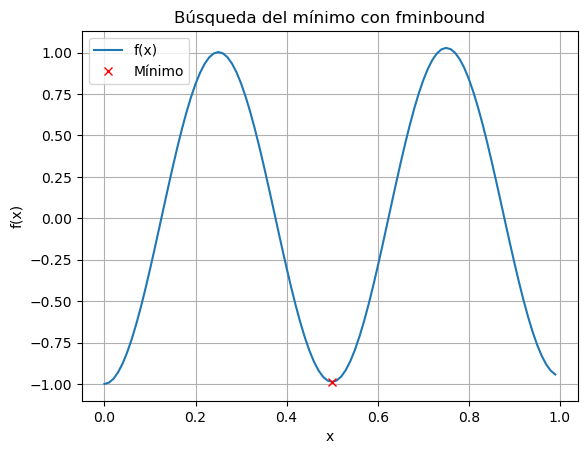

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound  # Importamos el método de optimización

# Definimos la función a minimizar, con parámetros a, b, c, d
def mi_funcion(x, a, b, c, d):
    return -np.cos(a * np.pi * x / b) + c * x**d

# Coeficientes de la función
a = 2
b = 0.5
c = 0.05
d = 2

# Intervalo de búsqueda del mínimo
x1 = 0.2
x2 = 0.6

# Creamos puntos para graficar la función en el intervalo [0, 1]
xt = np.arange(0, 1, 0.01)
yt = mi_funcion(xt, a, b, c, d)

# Usamos fminbound para encontrar el mínimo local entre x1 y x2
x_minimo = fminbound(mi_funcion, x1, x2, args=(a, b, c, d))

# Evaluamos la función en el mínimo encontrado
y_minimo = mi_funcion(x_minimo, a, b, c, d)

# Mostramos el resultado en consola
print(f"El mínimo está en x = {x_minimo:.3f}, y = {y_minimo:.3f}")

# Graficamos la función y el punto mínimo encontrado
plt.plot(xt, yt, label='f(x)')
plt.plot(x_minimo, y_minimo, 'rx', label='Mínimo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Búsqueda del mínimo con fminbound')
plt.legend()
plt.grid(True)
plt.show()


# Maximo

El máximo está en x = 0.250, y = 1.003


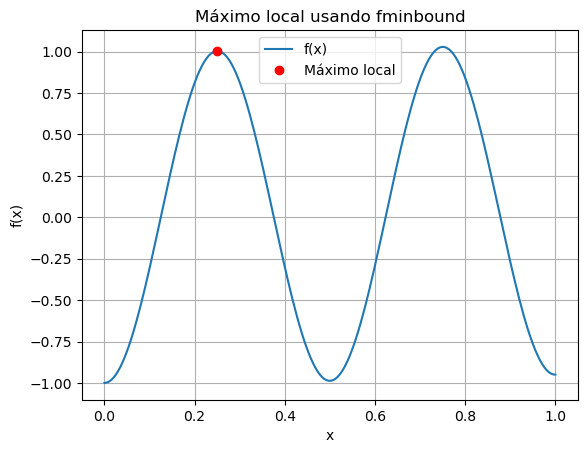

In [ ]:
# Función original
def mi_funcion(x, a, b, c, d):
    return -np.cos(a * np.pi * x / b) + c * x**d

# Función invertida para buscar máximos (cambiamos el signo)
def mi_funcion2(x, a, b, c, d):
    return -mi_funcion(x, a, b, c, d)

# Coeficientes
a = 2
b = 0.5
c = 0.05
d = 2

# Intervalo donde se buscará el máximo
x1 = 0.0
x2 = 0.4

# Puntos para graficar
xt = np.linspace(0, 1, 200)
yt = mi_funcion(xt, a, b, c, d)

# Buscamos el máximo de la función original como el mínimo de la invertida
x_max = fminbound(mi_funcion2, x1, x2, args=(a, b, c, d))
y_max = mi_funcion(x_max, a, b, c, d)

# Imprimimos el resultado
print(f"El máximo está en x = {x_max:.3f}, y = {y_max:.3f}")

# Graficamos la función y el punto del máximo
plt.plot(xt, yt, label="f(x)")
plt.plot(x_max, y_max, 'ro', label="Máximo local")
plt.title("Máximo local usando fminbound")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

### Otra opción, descenso de gradiente

El descenso de gradiente es un método utilizado para encontrar el valor mínimo de una función, avanzando paso a paso en la dirección en la que la función disminuye más rápidamente. Es como bajar una colina siguiendo la pendiente, ajustando constantemente tu dirección hasta llegar al punto más bajo. Se usa ampliamente en tareas de optimización, especialmente en el entrenamiento de modelos de machine learning, donde se busca minimizar el error del modelo. La velocidad con la que se avanza se controla mediante un parámetro llamado tasa de aprendizaje, y es importante elegirlo bien para que el proceso sea eficiente y estable.

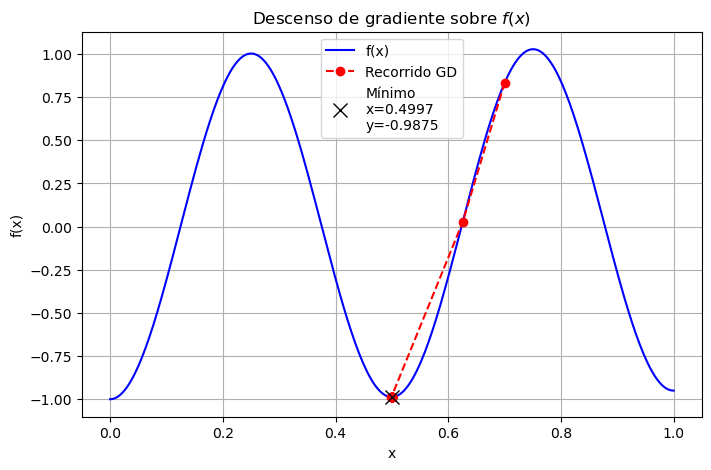

In [ ]:
# Parámetros de la función
a = 2
b = 0.5
c = 0.05
d = 2

# Función y su derivada (gradiente)
def f(x):
    return -np.cos(a * np.pi * x / b) + c * x**d

def grad_f(x):
    return (a * np.pi / b) * np.sin(a * np.pi * x / b) + c * d * x**(d - 1)

# Configuración del descenso de gradiente
x = 0.7           # Punto inicial
lr = 0.01          # Tasa de aprendizaje
tol = 1e-6         # Tolerancia
max_iter = 1000    # Máx. iteraciones

# Guardamos los puntos para graficar el recorrido
trayectoria = [x]

for i in range(max_iter):
    grad = grad_f(x)
    x_new = x - lr * grad
    trayectoria.append(x_new)
    if abs(x_new - x) < tol:
        break
    x = x_new

# Preparar datos para la gráfica de la función
xt = np.linspace(0, 1, 300)
yt = f(xt)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(xt, yt, label='f(x)', color='blue')
plt.plot(trayectoria, [f(xi) for xi in trayectoria], 'ro--', label='Recorrido GD')
plt.plot(x, f(x), 'kx', label=f'Mínimo\nx={x:.4f}\ny={f(x):.4f}', markersize=10)

plt.title('Descenso de gradiente sobre $f(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### Método de Newton-Raphson

En análisis numérico, el método de Newton (conocido también como el método de Newton-Raphson o el método de Newton-Fourier) es un algoritmo para encontrar aproximaciones de los ceros o raíces de una función real. También puede ser usado para encontrar el máximo o mínimo de una función, encontrando los ceros de su primera derivada.

## $f(x)=x^3 +4x^2 -10$

La ecuación mostrada tiene una raiz en [1,2], ya que f(1)=-5 y f(2)=14 (cambio de signo)  
Eje:Muestre los resultados parciales del algoritmo de Newton-Raphson con una tolerancia de 0.0001

El método requiere  obtener la derivada $f'(x)$ de la ecuación para el factor del denominador.

$f(x)=x^3 +4x^2 -10$  
$f'(x)=3x^2 +8x $  

$x_{i+1}=x_{i}- \frac{f(x_{i})}{f'(x_{i}}$

Para el desarrollo se inicia la búsqueda desde un punto en el intervalo [1,2], por ejemplo el extremo derecho, x1=2.

In [ ]:
fx  = lambda x: x**3 + 4*(x**2) - 10

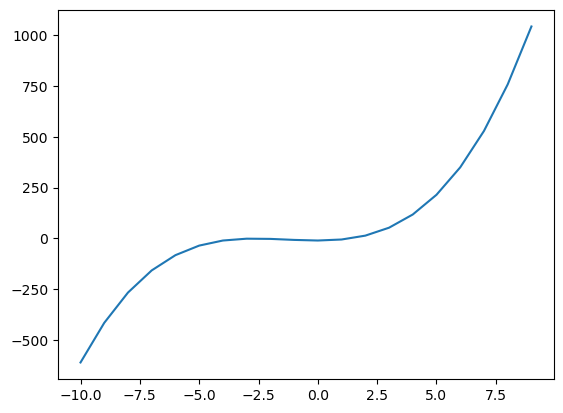

In [ ]:
plt.plot(np.arange(-10,10),fx(np.arange(-10,10)))

In [ ]:
# Método de Newton-Raphson
# Ejemplo 1 (Burden ejemplo 1 p.51/pdf.61)

import numpy as np

# INGRESO
fx  = lambda x: x**3 + 4*(x**2) - 10
dfx = lambda x: 3*(x**2) + 8*x

x0 = 2
tolera = 0.001

# PROCEDIMIENTO
tabla = []
tramo = abs(2*tolera)
xi = x0
while (tramo>=tolera):
    xnuevo = xi - fx(xi)/dfx(xi)
    tramo  = abs(xnuevo-xi)
    tabla.append([xi,xnuevo,tramo])
    xi = xnuevo

# convierte la lista a un arreglo.
tabla = np.array(tabla)
n = len(tabla)

# SALIDA
print(['xi', 'xnuevo', 'tramo'])
np.set_printoptions(precision = 4)
print(tabla)
print('raiz en: ', xi)
print('con error de: ',tramo)

['xi', 'xnuevo', 'tramo']
[[2.0000e+00 1.5000e+00 5.0000e-01]
 [1.5000e+00 1.3733e+00 1.2667e-01]
 [1.3733e+00 1.3653e+00 8.0713e-03]
 [1.3653e+00 1.3652e+00 3.2001e-05]]
raiz en:  1.3652300139161466
con error de:  3.200095847999407e-05


In [ ]:
import scipy.optimize as opt

opt.newton(fx,x0, fprime=dfx, tol = tolera)

1.3652300139161466

In [ ]:
?opt.newton

[Mas documentación de SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)